#  Apple Leaf Disease Classification with CNN using Tensorflow 2.0

### Introduction.

In this notebook, we'll demonstrate how to build a convolutional neural network model to classify Apple leaf diseases. We'll use the tensorflow keras API.

### Import necessary libraries 

In [3]:
import os
import cv2
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from tensorflow.keras.models import Sequential, load_model, model_from_json


This dataset was taken from this Kaggle link. https://www.kaggle.com/datasets/lavaman151/plantifydr-dataset

Here, we want to view a sample of our images. We'll use tf.keras image preprocessing library to load the image.

In [4]:
img1 =image.load_img('./train/Apple Black rot/AppleBlackRot(7).JPG')

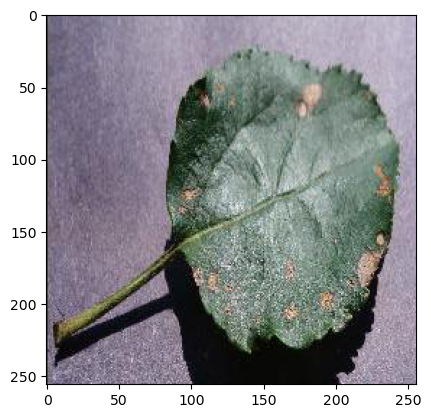

In [5]:
plt.imshow(img1)

In [6]:
cv2.imread('./train/Apple Black rot/AppleBlackRot(7).JPG').shape

(256, 256, 3)

### Referencing our data directories.

In [7]:
train_dir ='./train'
test_dir = './test'
IMG_SIZE = (256, 256)
BATCH_SIZE = 16

### Preprocess training image data.

Here, we'll load in our data using ImageDataGenerator Class in tensorflow. This allows us to rescale our images and split the data into train and validation data. It also loads our images in a specified batch size.

ImageDataGenerator infers the class labels from the directories name. We want to check the class labels.

In [8]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )
val_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )  

In [16]:
train_set = train_gen.flow_from_directory(
    train_dir,
    subset = 'training',
    class_mode = 'categorical',
    target_size = IMG_SIZE,
    batch_size = 16
)

Found 10525 images belonging to 4 classes.


In [17]:
val_set = val_gen.flow_from_directory(
   train_dir,
   subset = 'validation',
   class_mode = 'categorical',
   target_size = IMG_SIZE,
   batch_size = 16
   )

Found 2629 images belonging to 4 classes.


In [18]:
train_set.classes

array([0, 0, 0, ..., 3, 3, 3])

In [19]:
train_set.class_indices

{'Apple Black rot': 0,
 'Apple Healthy': 1,
 'Apple Scab': 2,
 'Cedar apple rust': 3}

### Building the model.

In [21]:

model = tf.keras.models.Sequential([
        
        layers.InputLayer(input_shape=(256, 256, 3)),
    
        layers.Conv2D( 32, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        #  #########
        
        layers.Conv2D( 64, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        #  #########
        
        layers.Conv2D( 64, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        #  #########
        
        layers.Conv2D( 64, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        #  #########
        
        layers.Conv2D( 128, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        # ##########
        
        layers.Conv2D( 64, 3,padding='valid', activation='relu'),
        
        layers.MaxPooling2D(pool_size=(2,2)),
        # ##########
        
        layers.Flatten(),
        
        layers.Dense(64, activation='relu'),
        
        layers.Dense(4, activation='softmax')
        ])

print(model.summary())



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [24]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
    )

We are now fitting the images into the model.

In [25]:
final_model = model.fit(
     train_set,
     epochs=15,
     validation_data=val_set, 
     steps_per_epoch = len(train_set),
     validation_steps = len(val_set)
     )

Epoch 1/15
658/658 [==============================] - 710s 1s/step - loss: 0.7716 - accuracy: 0.6896 - val_loss: 0.5497 - val_accuracy: 0.7737
Epoch 2/15
658/658 [==============================] - 663s 1s/step - loss: 0.4424 - accuracy: 0.8398 - val_loss: 0.3389 - val_accuracy: 0.8756
Epoch 3/15
658/658 [==============================] - 618s 934ms/step - loss: 0.2967 - accuracy: 0.8946 - val_loss: 0.1692 - val_accuracy: 0.9429
Epoch 4/15
658/658 [==============================] - 635s 961ms/step - loss: 0.1908 - accuracy: 0.9329 - val_loss: 0.1683 - val_accuracy: 0.9437
Epoch 5/15
658/658 [==============================] - 766s 1s/step - loss: 0.1206 - accuracy: 0.9578 - val_loss: 0.0962 - val_accuracy: 0.9700
Epoch 6/15
658/658 [==============================] - 744s 1s/step - loss: 0.1020 - accuracy: 0.9642 - val_loss: 0.0666 - val_accuracy: 0.9798
Epoch 7/15
658/658 [==============================] - 642s 972ms/step - loss: 0.0826 - accuracy: 0.9711 - val_loss: 0.0618 - val_accurac

### Preprocess test image data.
In the case of the test images, we'll only rescale the images and generate the batches.

In [26]:
test_gen = ImageDataGenerator(rescale=1./255)

In [27]:
test_set = test_gen.flow_from_directory(
    test_dir,
    class_mode = 'categorical',
    target_size = IMG_SIZE,
    batch_size = 16
)

Found 40 images belonging to 4 classes.


In [28]:
final_model.params

{'verbose': 1, 'epochs': 15, 'steps': 658}

In [29]:
final_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Evaluating our model.
Here, we'll plot the accuracy and loss for both training and validation data.

In [30]:
acc = final_model.history['accuracy']
val_acc = final_model.history['val_accuracy']

loss = final_model.history['loss']
val_loss = final_model.history['val_loss']

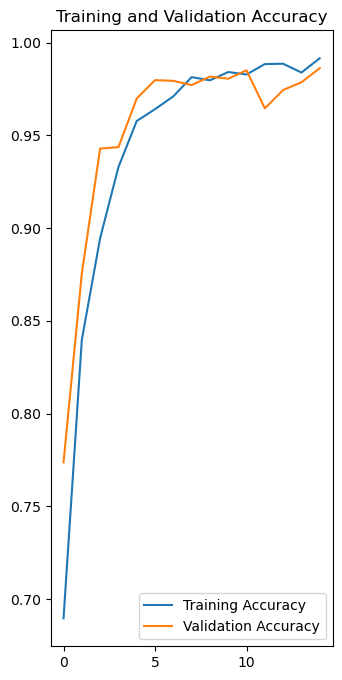

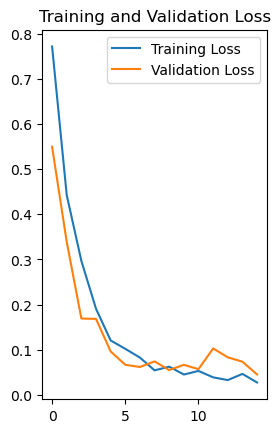

In [31]:
# plot the accuracy and loss
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(15), acc, label='Training Accuracy')
plt.plot(range(15), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
# plt.savefig('AccVal_acc')

plt.subplot(1, 2, 2)
plt.plot(range(15), loss, label='Training Loss')
plt.plot(range(15), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# plt.savefig('LossVal_loss')


We want to save our model for later use so that we don't have to train it all over again to save time.

In [32]:
model.save('./apple_leaf_cnn_model.h5')

### Making predictions with test images.

In [35]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = test_set.classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence

We want to evaluate our model's performance with the test images.

In [37]:
scores = model.evaluate(test_set, batch_size=64, verbose=2)

3/3 - 6s - loss: 1.3322 - accuracy: 0.6500 - 6s/epoch - 2s/step
